<a href="https://colab.research.google.com/github/IvRodco/EstadisticaAplicasa_1899843/blob/main/Sesion16_17_EA41_27_28sept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#estadistica Aplicada
##Sesion 16, 27 de septiembre
###Ivanna Lizeth Rodriguez Ambriz
###1899843
Grupo 41


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import yfinance as yf

In [ ]:
pip install yf

In [ ]:
walmex=yf.download('WALMEX.MX',start='2016-01-01',end='2021-12-31',progress=False)


In [ ]:
walmex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,42.959999,43.299999,42.299999,42.840000,35.479034,6483179
2016-01-05,42.849998,43.900002,42.540001,42.660000,35.329967,8115974
2016-01-06,42.650002,43.020000,42.070000,42.380001,35.098068,12511056
2016-01-07,41.320000,42.240002,39.259998,39.990002,33.118725,18124494
2016-01-08,40.990002,41.490002,40.700001,41.029999,33.980034,15949791


In [ ]:
walmex=walmex['Adj Close']

In [ ]:
walmex.to_excel('walmex.xlsx')
!cp walmex.xlsx "C:\Users\DELL\Documents\ILRA_1899843_EA"



In [ ]:
from google.colab import files
files.download('walmex.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

El promdio movil a 10 dias sirve para suavizar la volatilidad (la tendencia suavizada)



#SESION 17

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import yfinance as yf

In [ ]:
walmex=yf.download('WALMEX.MX',start='2016-01-01',end='2021-12-31',progress=False)
walmex=walmex[['Adj Close']]

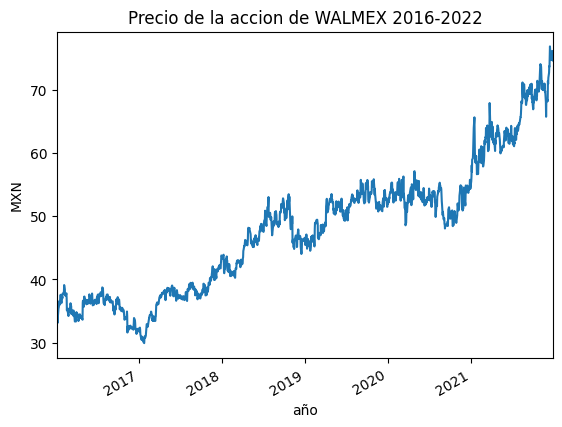

In [ ]:
walmex['Adj Close'].plot()
plt.title('Precio de la accion de WALMEX 2016-2022')
plt.ylabel('MXN')
plt.xlabel('año')
plt.xlim('2016-01-04','2021-12-30');

In [ ]:
#ponemos la primer fecha
walmex.head(1)

,Adj Close
Date,
2016-01-04,35.479031


In [ ]:
#Ponemos la ultima fecha
walmex.tail(1)

,Adj Close
Date,
2021-12-30,74.687416


In [ ]:
#calculamos los promedion moviles

#PMS-10 señal de corto plazo
walmex['PMS-10']=walmex['Adj Close'].rolling(10).mean()
#PMS-50 señal de largo plazo
walmex['PMS-50']=walmex['Adj Close'].rolling(50).mean()

<ipython-input-10-d4baca479890>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['PMS-10']=walmex['Adj Close'].rolling(10).mean()
<ipython-input-10-d4baca479890>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['PMS-50']=walmex['Adj Close'].rolling(50).mean()


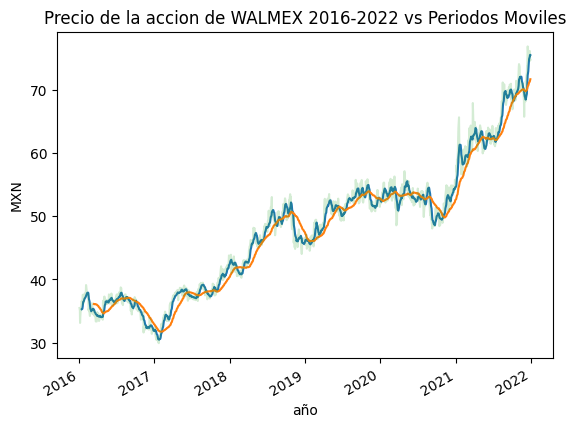

In [ ]:
#grafica PMS
walmex['PMS-10'].plot()
walmex['PMS-50'].plot()

#si: alpha=0 es transparente y si alpha=1 no transparente
#entonces ponemos valores entre cero y uno para que no este tan trasparente
walmex['Adj Close'].plot(alpha=0.2)

plt.title('Precio de la accion de WALMEX 2016-2022 vs Periodos Moviles')
plt.ylabel('MXN')
plt.xlabel('año');

In [ ]:
# definimos estrategia
walmex['estrategia']=walmex['PMS-10']>walmex['PMS-50']


<ipython-input-13-18968259b624>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['estrategia']=walmex['PMS-10']>walmex['PMS-50']


In [ ]:
walmex.head()

,Adj Close,PMS-10,PMS-50,estrategia
Date,,,,
2016-01-04,35.479031,NaN,NaN,False
2016-01-05,35.329964,NaN,NaN,False
2016-01-06,35.098064,NaN,NaN,False
2016-01-07,33.118729,NaN,NaN,False
2016-01-08,33.980030,NaN,NaN,False


##Formula de Retorno=$\frac{P_t-P_{t-1}} {P_{t-1}}$

##De igual manera hay una forma en python que es pct_change



In [ ]:
#calculamos retorno o rendimiento de la accion
walmex['retorno']=walmex['Adj Close'].pct_change()

<ipython-input-15-95bbd4e8aebf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmex['retorno']=walmex['Adj Close'].pct_change()


In [ ]:
walmex.head()

,Adj Close,PMS-10,PMS-50,estrategia,retorno
Date,,,,,
2016-01-04,35.479031,NaN,NaN,False,NaN
2016-01-05,35.329964,NaN,NaN,False,-0.004202
2016-01-06,35.098064,NaN,NaN,False,-0.006564
2016-01-07,33.118729,NaN,NaN,False,-0.056394
2016-01-08,33.980030,NaN,NaN,False,0.026006


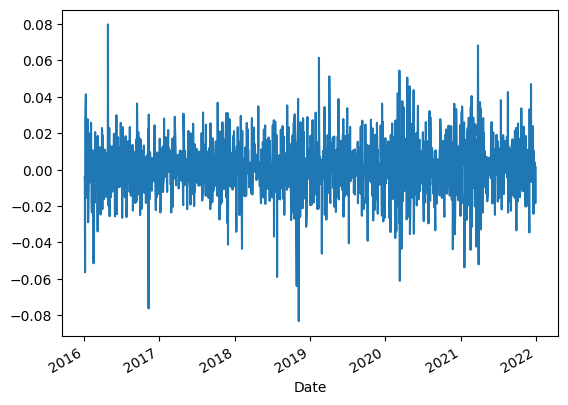

In [ ]:
#graficamos los retornos
walmex['retorno'].plot()
plt.title('Retorno de la accion de WALMEX 2016-2022')
plt.ylabel('retorno')
plt.xlabel('año');